## Data Source

Source:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing<br>
The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   The datasets: 1) bank.csv with all examples, ordered by date (from May 2008 to November 2010).
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).
## Bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8 - balance: Balance of the individual.<br>
## Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')<br>
10 - day: last contact day of the month (numeric) <br>
11 - month: last contact month of year 
(categorical: ”jan”, ”feb”, ”mar”, ..., ”dec”) <br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')<br>
## Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
17 - outcome(Y): has the client subscribed a term deposit? (binary: ”yes”,”no”) 

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
# feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
# For creating train/validation/test dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# MLxtend stands for "machine learning extensions"
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once') # to see the warning once

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Load Data

In [2]:
# bank data in DataFrame
df = pd.read_csv(filepath_or_buffer= 'bank.csv', sep=";", delimiter= None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# We print some information about dataframe
print('data type:', type(df))

# It is always good to double check the dimensions and see if they are what we expect.
print('data shape:', df.shape)
type(df)

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (4521, 17)


pandas.core.frame.DataFrame

In [4]:
# missing values per column:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## Overview of Data

In [5]:
round(df.describe(),4) # continuous variables

,age,balance,day,duration,campaign,pdays,previous
count,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000
mean,41.1701,1422.6578,15.9153,263.9613,2.7936,39.7666,0.5426
std,10.5762,3009.6381,8.2477,259.8566,3.1098,100.1211,1.6936
min,19.0000,-3313.0000,1.0000,4.0000,1.0000,-1.0000,0.0000
25%,33.0000,69.0000,9.0000,104.0000,1.0000,-1.0000,0.0000
50%,39.0000,444.0000,16.0000,185.0000,2.0000,-1.0000,0.0000
75%,49.0000,1480.0000,21.0000,329.0000,3.0000,-1.0000,0.0000
max,87.0000,71188.0000,31.0000,3025.0000,50.0000,871.0000,25.0000


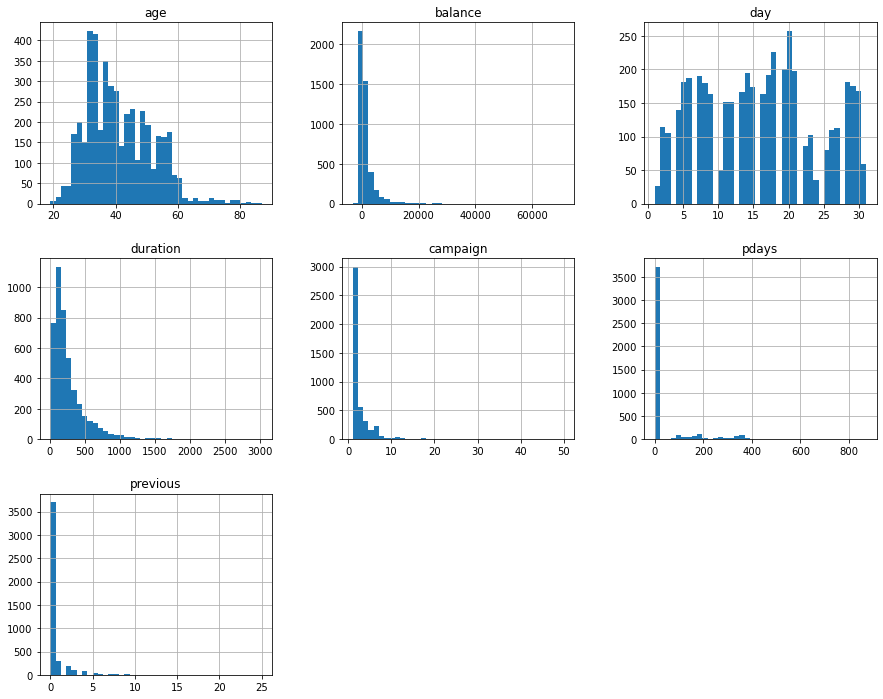

In [6]:
# distribution of continuous variables
df.hist(bins=40, figsize=(15,12))
plt.show()
# pdays, previous, etc. may need to be transformed or deleted

<AxesSubplot:>

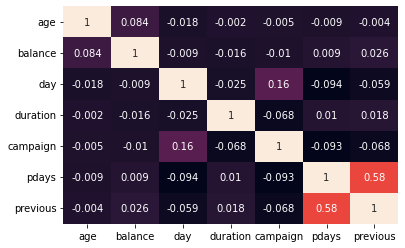

In [7]:
myCorr = round(df.corr(), 3)
sns.heatmap(myCorr, annot=True, cbar= False)
# pdays and previous have the highest correlation

## Possible outliers

####  outliers for Age

<AxesSubplot:xlabel='age', ylabel='y'>

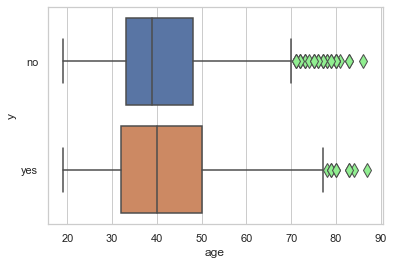

In [8]:
sns.set(style='whitegrid')
sns.boxplot(x='age', y='y', data=df, flierprops = dict(markerfacecolor = 'lightgreen', markersize = 10))

In [9]:
df.loc[df['age'] > 80]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
573,81,retired,married,secondary,no,1,no,no,cellular,19,aug,65,5,-1,0,unknown,no
633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no
1349,83,retired,married,primary,no,425,no,no,telephone,22,jun,883,1,140,1,failure,yes
1866,86,retired,married,secondary,no,1503,no,no,telephone,18,mar,165,3,101,1,other,no
3311,87,retired,married,primary,no,230,no,no,cellular,30,oct,144,1,-1,0,unknown,yes
4108,84,retired,divorced,primary,no,639,no,no,telephone,18,may,353,3,-1,0,unknown,yes
4323,83,retired,divorced,primary,no,0,no,no,telephone,31,may,664,1,77,3,success,no
4388,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes


#### Outlier of "balance"

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


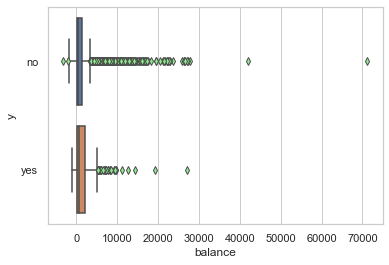

In [10]:
sns.boxplot(x='balance', y='y', data=df, flierprops = dict(markerfacecolor = 'lightgreen', markersize = 5))
df.loc[df['balance'] > 30000]

## Exploratory Data Analysis

In [11]:
df['poutcome'] = np.where(df['poutcome'] == 'other', 'unknown', df['poutcome'])
catcol = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
df[catcol] = df[catcol]. astype('category')

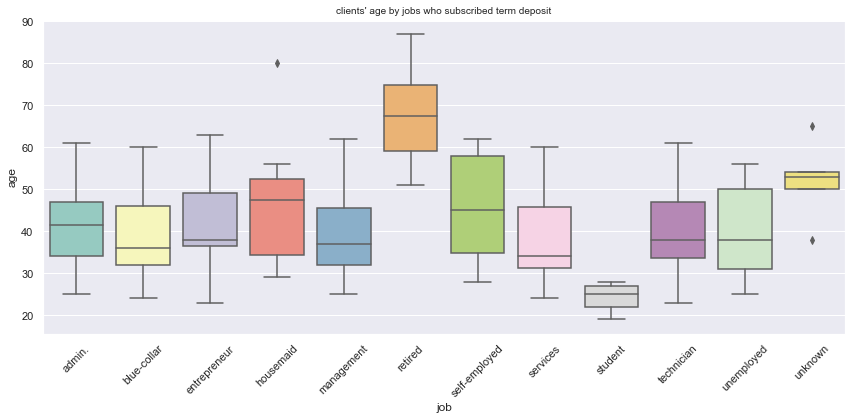

In [12]:
# Age by jobs
df_yis1 = df.loc[df["y"] == "yes"]
sns.set(rc={'figure.figsize':(12,6)}) #set width and height
ax=sns.boxplot(x="job", y="age", data=df_yis1, palette="Set3")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("clients' age by jobs who subscribed term deposit", fontsize=10)
plt.tight_layout()
plt.show()

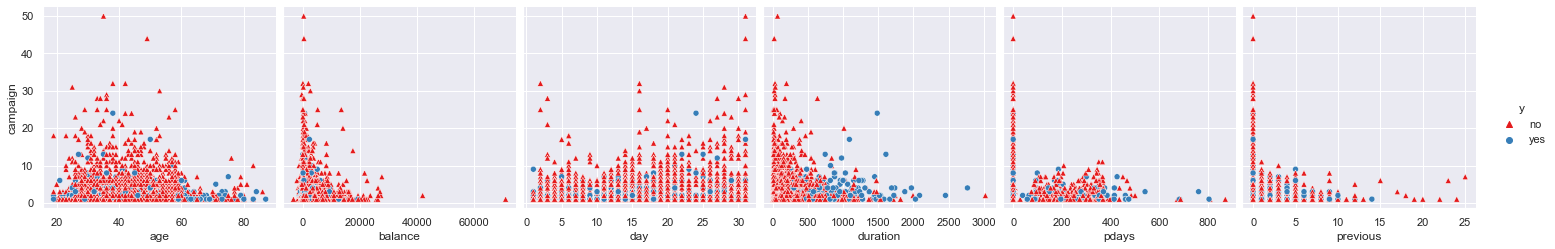

In [13]:
# sns.set(style="ticks")

sns.pairplot(data=df, x_vars=df[["age","balance","day", "duration", "pdays", "previous"]], 
             y_vars=['campaign'], hue="y", markers=["^", "o"], palette="Set1", height=3.5)
plt.show()

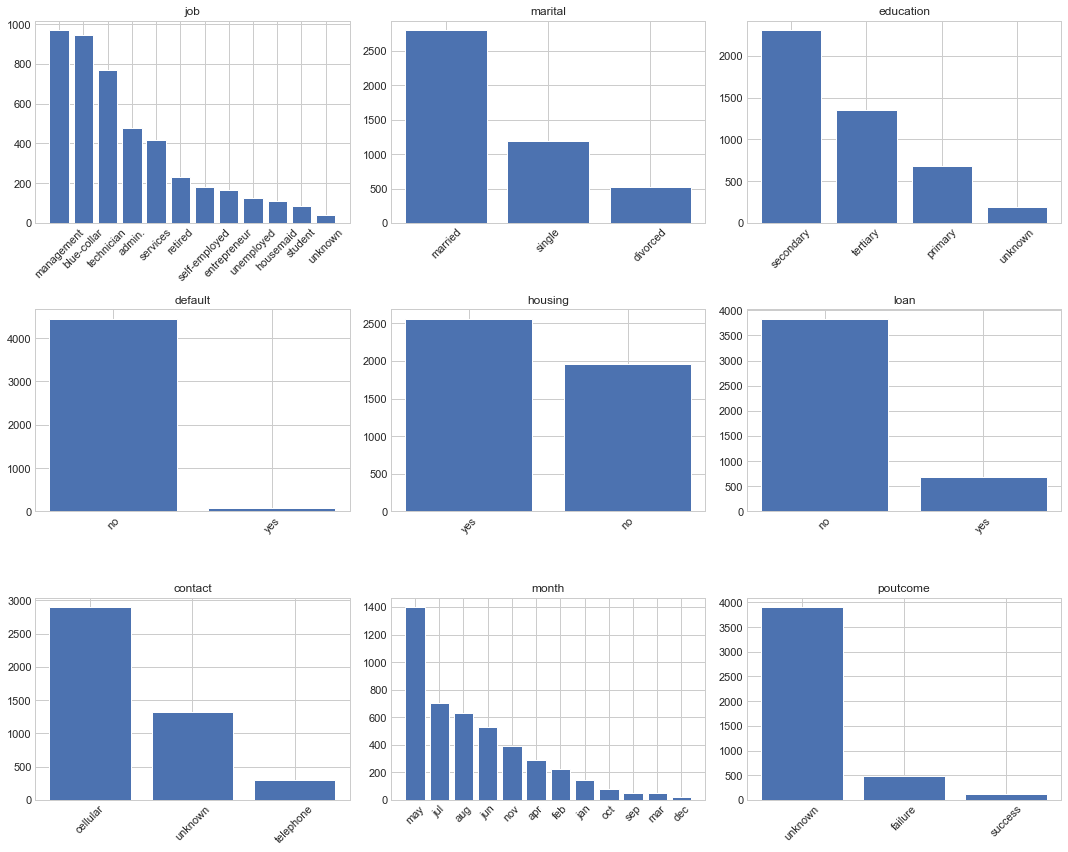

In [14]:
# distribution of categorical variables
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(15, 12))

counter = 0
for cat_column in catcol[0:9]:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(45)
    
    counter += 1
fig.tight_layout()
plt.show()

In [15]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

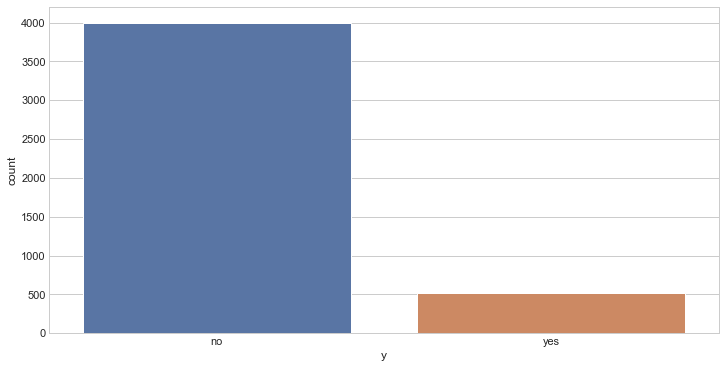

In [16]:
sns.countplot(data=df, x='y')

In [17]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

y               no  yes
job                    
admin.         420   58
blue-collar    877   69
entrepreneur   153   15
housemaid       98   14
management     838  131
retired        176   54
self-employed  163   20
services       379   38
student         65   19
technician     685   83
unemployed     115   13
unknown         31    7


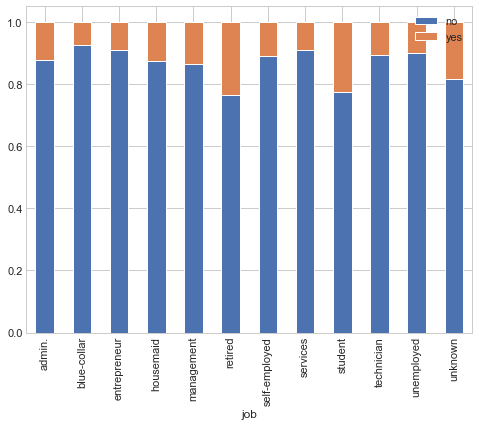

In [18]:
#job vs y
print(pd.crosstab(df['job'],df['y']))

job = pd.crosstab(df['job'],df['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));
plt.legend(loc='upper right')


In [19]:
#Marital status vs y
marital = pd.crosstab(df['marital'], df['y'])
marital

y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


In [20]:
#default vs subscription
dflt = pd.crosstab(df['default'], df['y'])
dflt

y,no,yes
default,,
no,3933,512
yes,67,9


In [21]:
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.884814,0.115186
yes,0.881579,0.118421


In [22]:
# catcol[0:8]

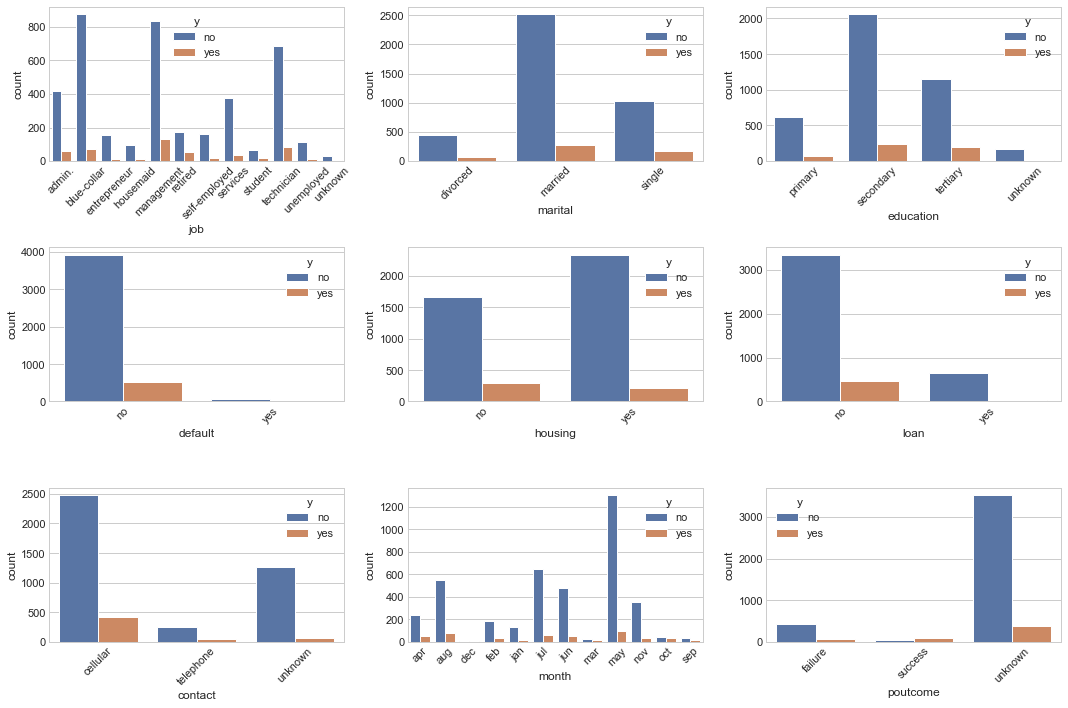

In [23]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(15, 10))
counter=0
for i in range(3):
    for j in range(3):
            sns.countplot(data=df, x=catcol[counter], hue='y', ax=axs[i, j])
            for tick in axs[i, j].get_xticklabels():
                tick.set_rotation(45)
            counter += 1
fig.tight_layout()           
plt.show()

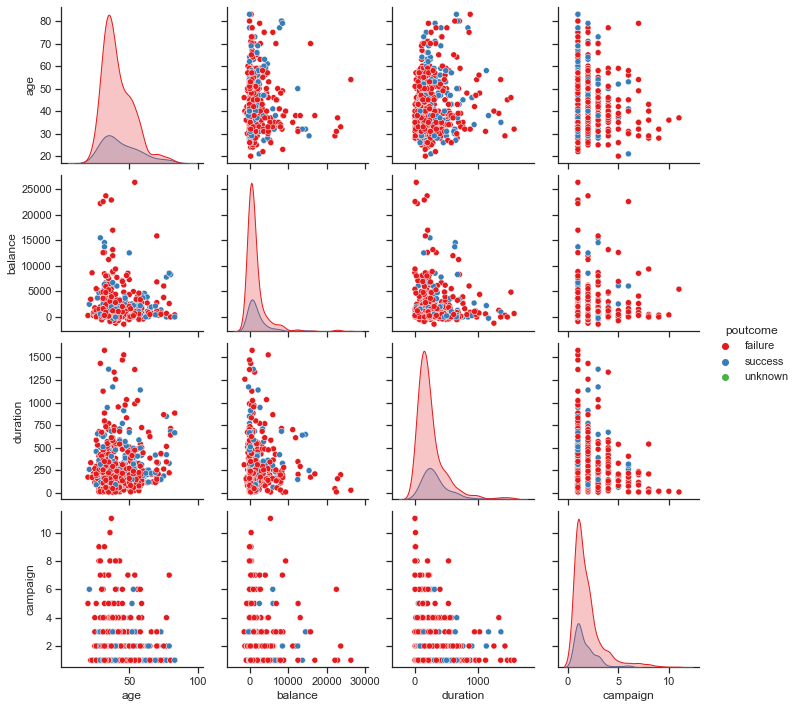

In [24]:
#We can quickly look at other data.
#Look at the bottom row to see thinks likely coorelated with price.
#Look along the diagonal to see histograms of each.
sns.set(style="ticks")

df_poutcome1 =  df.loc[(df["poutcome"] == "failure") | (df["poutcome"] == "success")]
sns.pairplot(df_poutcome1[["age", "balance", "duration", "campaign", "poutcome"]], hue="poutcome", palette="Set1")
plt.show()

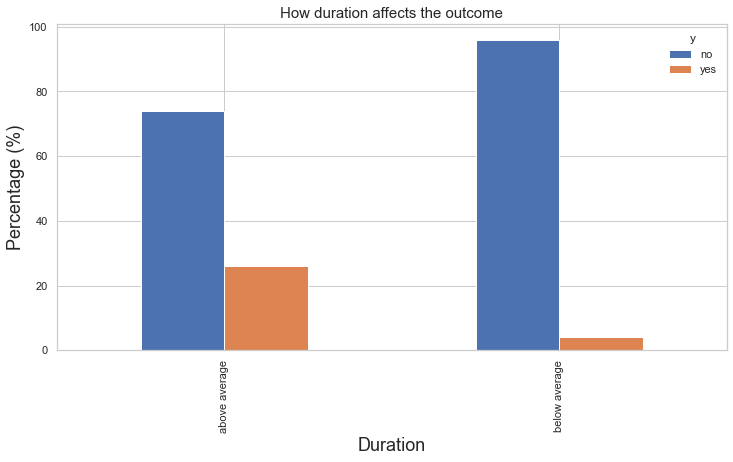

In [25]:
# How duration affects y
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

list1 = [df]

for col in list1:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False)
plt.title("How duration affects the outcome", fontsize=15)
plt.xlabel("Duration", fontsize=18)
plt.ylabel("Percentage (%)", fontsize=18)
plt.show()

In [26]:
df = df.drop('duration_status', axis=1)

## Standardization

In [27]:
contcol = ["age", "balance", "day", "duration", "campaign", 'pdays', "previous"]
df1 = df

# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[contcol] = scaler.fit_transform(df1[contcol])

In [28]:
round(df1.describe(), 4) # continuous variables

,age,balance,day,duration,campaign,pdays,previous
count,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000,4521.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-2.0965,-1.5737,-1.8086,-1.0005,-0.5768,-0.4072,-0.3204
25%,-0.7726,-0.4498,-0.8385,-0.6156,-0.5768,-0.4072,-0.3204
50%,-0.2052,-0.3252,0.0103,-0.3039,-0.2552,-0.4072,-0.3204
75%,0.7404,0.0191,0.6166,0.2503,0.0664,-0.4072,-0.3204
max,4.3338,23.1832,1.8292,10.6264,15.1815,8.3032,14.4430


## Encoding categorical features

In [29]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,-0.772583,services,married,secondary,no,-0.583410,yes,no,cellular,1.707910,jul,0.250315,0.709566,-0.407218,-0.320413,unknown,no
4517,1.496912,self-employed,married,tertiary,yes,-1.573671,yes,yes,unknown,-0.838546,may,-0.427057,-0.576829,-0.407218,-0.320413,unknown,no
4518,1.496912,technician,married,secondary,no,-0.374724,no,no,cellular,0.374052,aug,-0.434754,2.639160,-0.407218,-0.320413,unknown,no
4519,-1.245394,blue-collar,married,secondary,no,-0.094925,no,no,cellular,-1.202326,feb,-0.519426,0.387967,1.710451,1.451197,unknown,no
4520,0.267602,entrepreneur,single,tertiary,no,-0.095257,yes,yes,cellular,-1.566105,apr,0.311894,-0.255231,2.090033,3.813344,unknown,no


In [30]:
# from sklearn import preprocessing
# enc = preprocessing.OneHotEncoder()
# enc = preprocessing.OrdinalEncoder()
# lb = preprocessing.LabelBinarizer()

le = preprocessing.LabelEncoder()
df1 = df1.apply(le.fit_transform)
df1.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,2,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,2,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,2,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,2,0
4520,25,2,2,2,0,1186,1,1,0,2,0,341,1,161,7,2,0


In [31]:
df1.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,2,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,2,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,2,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,2,0
4520,25,2,2,2,0,1186,1,1,0,2,0,341,1,161,7,2,0


In [32]:
# catcol = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

# lb = preprocessing.LabelBinarizer()
# jobs_encoder = LabelBinarizer()
# transformed = lb.fit(df1[catcol])
# transformed = jobs_encoder.transform(data['Profession'])
# ohe_df = pd.DataFrame(transformed)
# ohe_df
# data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)

## Split Data

In [33]:
X, y = df1.iloc[:, 0:16], df1.iloc[:, 16]
# X.head()

X_nontest, X_test, y_nontest, y_test  = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022)

X_train, X_val, y_train, y_val  = train_test_split(X_nontest, y_nontest, test_size=0.2, 
                                                   shuffle=True, random_state=2022) # 0.2 x 0.8 

In [34]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
346,38,4,1,2,0,1414,0,0,0,28,5,335,2,0,0,2
3673,17,2,1,2,0,1789,0,0,2,15,6,873,3,0,0,2
3386,13,1,1,1,0,761,1,0,2,4,8,507,0,0,0,2
1171,17,0,2,1,0,274,0,0,0,19,0,594,0,0,0,2
3238,34,0,0,1,0,274,1,1,0,29,0,554,1,0,0,2


In [35]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'y_val.shape: {y_val.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (2892, 16)
y_train.shape: (2892,)
X_val.shape: (724, 16)
y_val.shape: (724,)
X_test.shape: (905, 16)
y_test.shape: (905,)


## Logistic Regression

In [36]:
# model - logistic model
# from sklearn.linear_model import LogisticRegression

# specify the logistic model
model_logistic = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)

# fit the logistic model 
model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [37]:
# print('Coefficients: \n', model_logistic.coef_)
# print('Intercept: \n', model_logistic.intercept_)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":model_logistic.coef_[0]}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Feature,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Coefficients,0.005393,-0.000687,0.109096,0.12853,0.23904,0.00027,-0.727792,-0.613479,-0.485272,0.003492,-0.013831,0.005789,-0.075087,-0.000403,0.112461,-0.23275


In [38]:
# print("logistic Prediction: ", model_logistic.predict(X_test), "\n")

print(f'model_logistic, Training set accuracy: {model_logistic.score(X_train, y_train)*100:.2f}%')
print(f'model_logistic, Test set accuracy: {model_logistic.score(X_test, y_test)*100:.2f}%')

model_logistic, Training set accuracy: 88.90%
model_logistic, Test set accuracy: 88.29%


In [39]:
train_logistic = model_logistic.predict(X_train)
pred_logistic = model_logistic.predict(X_test)
acc_logistic0 = accuracy_score(train_logistic, y_train) # save the accuracy
print(classification_report(train_logistic, y_train))
acc_logistic = accuracy_score(pred_logistic, y_test) # save the accuracy
print(classification_report(pred_logistic, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2760
           1       0.21      0.51      0.29       132

    accuracy                           0.89      2892
   macro avg       0.59      0.71      0.62      2892
weighted avg       0.94      0.89      0.91      2892

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       855
           1       0.26      0.60      0.36        50

    accuracy                           0.88       905
   macro avg       0.62      0.75      0.65       905
weighted avg       0.94      0.88      0.90       905



Text(0.5, 1.0, 'Logistic Regression')

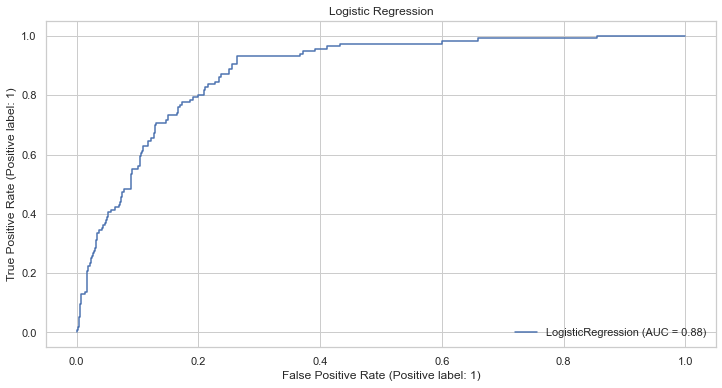

In [40]:
# import sklearn.metrics as metrics

metrics.plot_roc_curve(model_logistic, X_test, y_test)
plt.title("Logistic Regression")

# print('roc_auc_score is: ', roc_auc_score(y_test, pred_logistic))

In [41]:
# from sklearn.model_selection import cross_val_score

# None, to use the default 5-fold cross validation,
print(cross_val_score(model_logistic, X_train, y_train, cv=None))
print(cross_val_score(model_logistic, X_test, y_test, cv=None))

[0.88428325 0.89637306 0.88062284 0.89446367 0.88581315]
[0.89502762 0.87845304 0.88950276 0.87292818 0.86740331]


## Naive Bayes

In [42]:
# from sklearn.naive_bayes import GaussianNB

# specify the Gaussian NB model
model_GNB = GaussianNB()

# fit the Gaussian Naive Bayes model
model_GNB.fit(X_train, y_train)

GaussianNB()

In [43]:
# model - Gaussian Naive Bayes
# print("Gaussian Naive Bayes Prediction: ", model_GNB.predict(X_test), "\n")

print(f'model_GNB, Training set accuracy: {model_GNB.score(X_train, y_train)*100:.2f}%')
print(f'model_GNB, Test set accuracy: {model_GNB.score(X_test, y_test)*100:.2f}%')

model_GNB, Training set accuracy: 85.48%
model_GNB, Test set accuracy: 84.97%


In [44]:
train_GNB = model_GNB.predict(X_train)
acc_GNB0 = accuracy_score(train_GNB, y_train) # save the accuracy
print(classification_report(train_GNB, y_train))

pred_GNB = model_GNB.predict(X_test)
acc_GNB = accuracy_score(pred_GNB, y_test) # save the accuracy
print(classification_report(pred_GNB, y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2483
           1       0.48      0.38      0.43       409

    accuracy                           0.85      2892
   macro avg       0.69      0.66      0.67      2892
weighted avg       0.84      0.85      0.85      2892

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       771
           1       0.49      0.43      0.46       134

    accuracy                           0.85       905
   macro avg       0.70      0.67      0.68       905
weighted avg       0.84      0.85      0.85       905



## Perceptron

In [45]:
# from sklearn.linear_model import Perceptron
model_percep = Perceptron(max_iter=500)

# fit the perceptron model
model_percep.fit(X_train, y_train)

Perceptron(max_iter=500)

In [46]:
print(f'model_percetron, Training set accuracy: {model_percep.score(X_train, y_train)*100:.2f}%')
print(f'model_percetron, Test set accuracy: {model_percep.score(X_test, y_test)*100:.2f}%')

model_percetron, Training set accuracy: 82.23%
model_percetron, Test set accuracy: 82.98%


#### Tune the model

In [47]:
train_percep = model_percep.predict(X_train)
acc_percep0 = accuracy_score(train_percep, y_train) # save the accuracy
# print(classification_report(train_percep, y_train))

pred_percep = model_percep.predict(X_test)
acc_percep = accuracy_score(pred_percep, y_test) # save the accuracy
print(classification_report(pred_percep, y_test))#### Tune the model


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       775
           1       0.40      0.35      0.37       130

    accuracy                           0.83       905
   macro avg       0.65      0.63      0.64       905
weighted avg       0.82      0.83      0.83       905



## KNN

In [48]:
model_KNN = KNeighborsClassifier(n_neighbors=3)
# fit the kNN model
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
print(f'model_kNN, Training set accuracy: {model_KNN.score(X_train, y_train)*100:.2f}%' )
print(f'model_kNN, Test set accuracy: {model_KNN.score(X_test, y_test)*100:.2f}%' )

model_kNN, Training set accuracy: 92.39%
model_kNN, Test set accuracy: 86.19%


#### Tune the model

In [50]:
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": np.arange(1,3), "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator = model_KNN, param_grid = params, cv = 10, verbose=2, n_jobs = 4)
grid.fit(X_val, y_val)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8812024353120244
2


In [51]:
# re-fit the kNN model
model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(X_train, y_train)
print(f'model_kNN, Training set accuracy: {model_KNN.score(X_train, y_train)*100:.2f}%' )
print(f'model_kNN, Test set accuracy: {model_KNN.score(X_test, y_test)*100:.2f}%' )

model_kNN, Training set accuracy: 91.98%
model_kNN, Test set accuracy: 86.63%


In [52]:
train_KNN = model_KNN.predict(X_train)
acc_KNN0 = accuracy_score(train_KNN, y_train) # save the accuracy
# print(classification_report(train_KNN, y_train2))

pred_KNN = model_KNN.predict(X_test)
acc_KNN = accuracy_score(pred_KNN, y_test) # save the accuracy
print(classification_report(pred_KNN, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       876
           1       0.10      0.41      0.17        29

    accuracy                           0.87       905
   macro avg       0.54      0.65      0.55       905
weighted avg       0.95      0.87      0.90       905



## Support Vector Machine

In [53]:
# from sklearn.svm import SVC # "Support vector classifier"

# model_svm_linear = SVC(kernel='linear', C=1E10) # set the C parameter to a very large number

model_svm_rbf = SVC(kernel='rbf', random_state=2022) # radial basis function
model_svm_rbf.fit(X_train, y_train)


SVC(random_state=2022)

In [54]:
# print("support vector rbf Prediction: ", model_svm_rbf.predict(X_test), "\n")

print(f'model_svm, Training set accuracy: {model_svm_rbf.score(X_train, y_train)*100:.2f}%' )
print(f'model_svm, Test set accuracy: {model_svm_rbf.score(X_test, y_test)*100:.2f}%' )

model_svm, Training set accuracy: 88.83%
model_svm, Test set accuracy: 87.18%


In [55]:
train_rbf = model_svm_rbf.predict(X_train)
acc_rbf0 = accuracy_score(train_rbf, y_train) # save the accuracy
print(classification_report(train_rbf, y_train))

pred_rbf = model_svm_rbf.predict(X_test)
acc_rbf = accuracy_score(pred_rbf, y_test) # save the accuracy
print(classification_report(pred_rbf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2892
           1       0.00      0.00      0.00         0

    accuracy                           0.89      2892
   macro avg       0.50      0.44      0.47      2892
weighted avg       1.00      0.89      0.94      2892

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       905
           1       0.00      0.00      0.00         0

    accuracy                           0.87       905
   macro avg       0.50      0.44      0.47       905
weighted avg       1.00      0.87      0.93       905



Text(0.5, 1.0, 'Support Vector Machine')

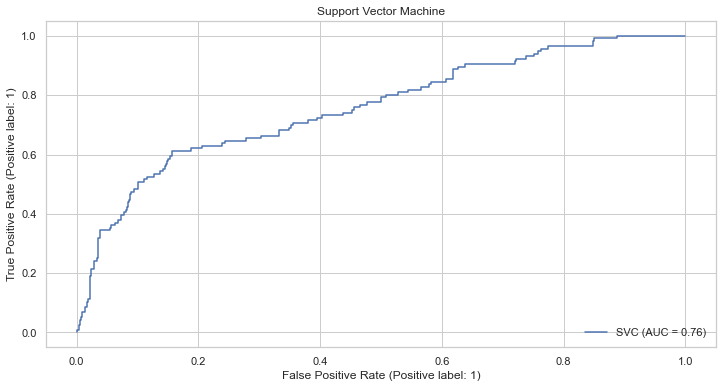

In [56]:
metrics.plot_roc_curve(model_svm_rbf, X_test, y_test)
plt.title("Support Vector Machine")

## Random Forest

In [57]:
# from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=10, random_state=2022) # The maximum depth of the tree = 10.

# fit the random forest model
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [58]:
print(f'model_rf, Training set accuracy: {model_rf.score(X_train, y_train)*100:.2f}%' )
print(f'model_rf, Test set accuracy: {model_rf.score(X_test, y_test)*100:.2f}%' )

model_rf, Training set accuracy: 96.99%
model_rf, Test set accuracy: 87.62%


#### Tune the Model

In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 60, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# *************************************************
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [5, 11, 17, 23, 29, 35, 41, 47, 53, 60], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [60]:
# from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

rf_Grid.fit(X_val, y_val)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, random_state=2022),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 11, 17, 23, 29, 35, 41, 47, 53,
                                          60]},
             verbose=2)

In [61]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [62]:
# refit the model
model_rf = RandomForestClassifier(bootstrap= True, max_depth=4, max_features = 'auto', 
                                  min_samples_leaf= 1, min_samples_split= 2, n_estimators= 17, random_state=2022) 
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=17, random_state=2022)

In [63]:
print(f'model_rf, Training set accuracy: {model_rf.score(X_train, y_train)*100:.2f}%' )
print(f'model_rf, Test set accuracy: {model_rf.score(X_test, y_test)*100:.2f}%' )

model_rf, Training set accuracy: 89.18%
model_rf, Test set accuracy: 87.62%


In [64]:
train_rf = model_rf.predict(X_train)
acc_rf0 = accuracy_score(train_rf, y_train) # save the accuracy
print(classification_report(train_rf, y_train))

pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(pred_rf, y_test) # save the accuracy
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2878
           1       0.04      0.86      0.07        14

    accuracy                           0.89      2892
   macro avg       0.52      0.87      0.51      2892
weighted avg       0.99      0.89      0.94      2892

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       901
           1       0.03      1.00      0.07         4

    accuracy                           0.88       905
   macro avg       0.52      0.94      0.50       905
weighted avg       1.00      0.88      0.93       905



## Shrinkage Methods/Regularization

In [65]:
# L1 regularization is Lasso Regression
model_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=2022) 
model_logistic_lasso.fit(X_train, y_train)
pred_logistic_lasso = model_logistic_lasso.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),
              "Coefficients": np.round(model_logistic_lasso.coef_[0], 4) }).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Feature,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Coefficients,0.0021,-0.0028,0.0322,0.1103,0.0,0.0003,-0.7605,-0.5817,-0.4796,0.0016,-0.0144,0.0057,-0.0717,-0.0005,0.1104,-0.2527


In [66]:
train_logistic_lasso = model_logistic_lasso.predict(X_train)
acc_lasso0 = accuracy_score(train_logistic_lasso, y_train)
acc_lasso = accuracy_score(pred_logistic_lasso, y_test) # save the accuracy
print(f'model_logistic_lasso, Training set accuracy: {model_logistic_lasso.score(X_train, y_train)*100:.2f}%')
print(f'model_logistic_lasso, Test set accuracy: {model_logistic_lasso.score(X_test, y_test)*100:.2f}%') # slightly better

# None, to use the default 5-fold cross validation,
print(cross_val_score(model_logistic_lasso, X_train, y_train, cv=None))

model_logistic_lasso, Training set accuracy: 88.97%
model_logistic_lasso, Test set accuracy: 88.18%
[0.88773748 0.89464594 0.88062284 0.89446367 0.88581315]


Text(0.5, 1.0, 'Lasso Regression')

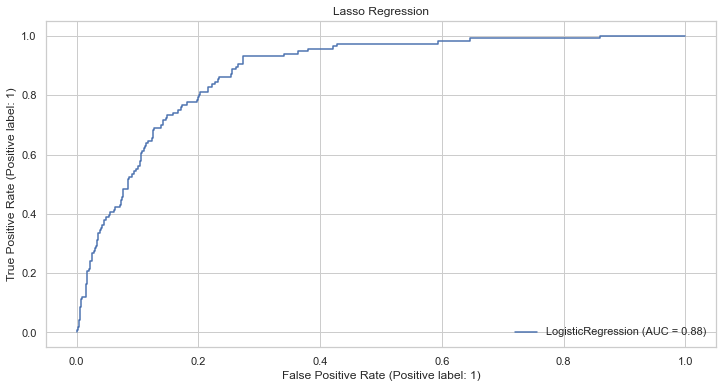

In [67]:
metrics.plot_roc_curve(model_logistic_lasso, X_test, y_test)
plt.title("Lasso Regression")

In [68]:
# L2 regularization is Ridge Regression
model_logistic_ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=2022,) 
model_logistic_ridge.fit(X_train, y_train)
pred_logistic_ridge = model_logistic_ridge.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),
              "Coefficients": np.round(model_logistic_ridge.coef_[0], 4) }).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Feature,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Coefficients,-0.0006,-0.0073,0.0111,0.0948,0.2181,0.0002,-0.7538,-0.6177,-0.4838,-0.0005,-0.0193,0.0057,-0.0732,-0.0013,0.1053,-0.355


In [69]:
train_logistic_ridge = model_logistic_ridge.predict(X_train)
acc_ridge0 = accuracy_score(train_logistic_ridge, y_train)
acc_ridge = accuracy_score(pred_logistic_ridge, y_test) # save the accuracy
print(f'model_logistic_ridge, Training set accuracy: {model_logistic_ridge.score(X_train, y_train)*100:.2f}%')
print(f'model_logistic_ridge, Test set accuracy: {model_logistic_ridge.score(X_test, y_test)*100:.2f}%') # slightly better

# None, to use the default 5-fold cross validation,
print(cross_val_score(model_logistic_ridge, X_train, y_train, cv=None))


model_logistic_ridge, Training set accuracy: 89.11%
model_logistic_ridge, Test set accuracy: 88.18%
[0.88428325 0.89637306 0.87889273 0.89446367 0.88927336]


Text(0.5, 1.0, 'Ridge Regression')

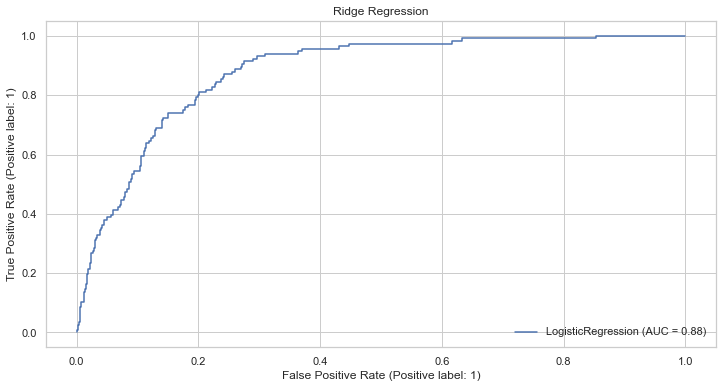

In [70]:
metrics.plot_roc_curve(model_logistic_ridge, X_test, y_test)
plt.title("Ridge Regression")

## Boosting 

In [71]:
#train Gradient Boosting model
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2022)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2022)

In [72]:
print(f'model_GB, Training set accuracy: {model_gb.score(X_train, y_train)*100:.2f}%')
print(f'model_GB, Test set accuracy: {model_gb.score(X_test, y_test)*100:.2f}%')

model_GB, Training set accuracy: 90.63%
model_GB, Test set accuracy: 89.06%


In [73]:
train_gb = model_gb.predict(X_train)
acc_gb0 = accuracy_score(train_gb, y_train) # save the accuracy
# print(classification_report(train_gb, y_train))

pred_gb = model_gb.predict(X_test)
acc_gb = accuracy_score(pred_gb, y_test) # save the accuracy
print(classification_report(pred_gb, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       832
           1       0.39      0.62      0.48        73

    accuracy                           0.89       905
   macro avg       0.68      0.77      0.71       905
weighted avg       0.92      0.89      0.90       905



## Model Accuracy Comparison

In [74]:
acc_table = pd.DataFrame({'Model': ['Logistic',
                                   'Naive Bayes',
                                    'Perceptron',
                                   'KNN',
                                    'SVM',
                                   'Random Forest',
                                    'Lasso',
                                    'Ridge', 
                                    'Gradient Boosting'
                                   ],
                          
                         'Accuracy Score of train': [acc_logistic0,
                                            acc_GNB0,
                                            acc_percep0,
                                           acc_KNN0,
                                           acc_rbf0,
                                           acc_rf0,
                                            acc_lasso0,
                                            acc_ridge0, 
                                            acc_gb0,
                                           ]})
acc_table = acc_table.sort_values(by='Accuracy Score of train', ascending=False)
acc_table.style.background_gradient(cmap='Blues')

,Model,Accuracy Score of train
3,KNN,0.919779
8,Gradient Boosting,0.906293
5,Random Forest,0.891770
7,Ridge,0.891079
6,Lasso,0.889696
0,Logistic,0.889004
4,SVM,0.888313
1,Naive Bayes,0.854772
2,Perceptron,0.822268


In [75]:
acc_table = pd.DataFrame({'Model': ['Logistic',
                                   'Naive Bayes',
                                    'Perceptron',
                                   'KNN',
                                    'SVM',
                                   'Random Forest',
                                    'Lasso',
                                    'Ridge', 
                                    'Gradient Boosting'
                                   ],
                          
                         'Accuracy Score of test': [acc_logistic,
                                            acc_GNB,
                                            acc_percep,
                                           acc_KNN,
                                           acc_rbf,
                                           acc_rf,
                                            acc_lasso,
                                            acc_ridge, 
                                            acc_gb,
                                           ]})
acc_table = acc_table.sort_values(by='Accuracy Score of test', ascending=False)
acc_table.style.background_gradient(cmap='Reds')

,Model,Accuracy Score of test
8,Gradient Boosting,0.890608
0,Logistic,0.882873
6,Lasso,0.881768
7,Ridge,0.881768
5,Random Forest,0.876243
4,SVM,0.871823
3,KNN,0.866298
1,Naive Bayes,0.849724
2,Perceptron,0.829834


## Feature Selection

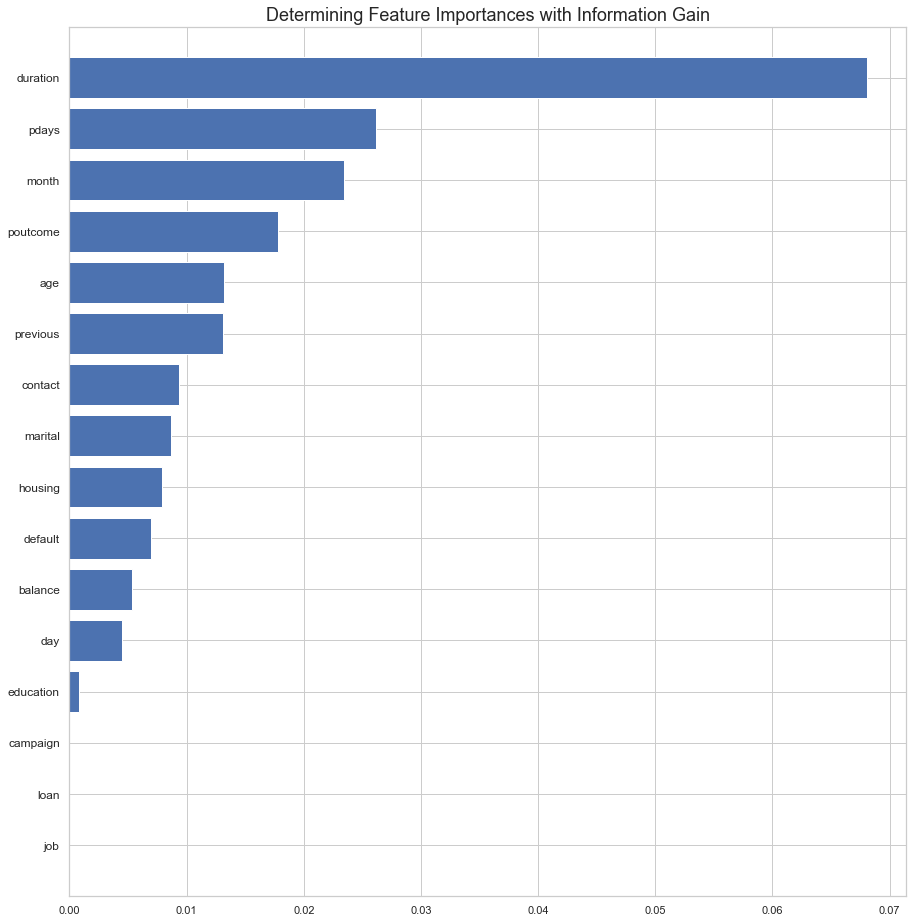

In [76]:
## Mutual Information Gain

# Estimate mutual information for a discrete target variable
# Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
importances = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=2022)
# print(importances)
feature_names = X_train.columns
indices = np.argsort(importances)[::1]

myTitle = "Determining Feature Importances with Information Gain"
def feature_importance_graph(indices, importances, feature_names, title_name):
    plt.figure(figsize=(15,16))
    plt.title(title_name, fontsize=18)
    plt.barh(range(len(indices)), importances[indices],  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=12)
    plt.ylim([-1, len(indices)])
#     plt.ylim([len(indices)-20, len(indices)])
    plt.show()
    return(feature_names[indices])

mutualGainColLint = feature_importance_graph(indices, importances, feature_names, myTitle)


In [77]:
# ***** feature selection by mutual information gain ******
X_train_infor = X_train.loc[:, mutualGainColLint]
X_test_infor = X_test.loc[:, mutualGainColLint]

In [78]:
model_logistic_1 = LogisticRegression(random_state=2022, solver='lbfgs', max_iter=10000)
model_logistic_1.fit(X_train_infor, y_train)
pred_logistic_1 = model_logistic_1.predict(X_test_infor)
print(f'model_logistic_1, Training set accuracy: {model_logistic_1.score(X_train_infor, y_train)*100:.2f}%')
print(f'model_logistic_1, Test set accuracy: {model_logistic_1.score(X_test_infor, y_test)*100:.2f}%') # slightly better

model_rf_1 = RandomForestClassifier(max_depth=15, random_state=2022) # The maximum depth of the tree = 15.
model_rf_1.fit(X_train_infor, y_train)
pred_rf_1 = model_rf_1.predict(X_test_infor)
print(f'model_rf_1, Training set accuracy: {model_rf_1.score(X_train_infor, y_train)*100:.2f}%' )
print(f'model_rf_1, Test set accuracy: {model_rf_1.score(X_test_infor, y_test)*100:.2f}%' ) # slightly better

model_logistic_1, Training set accuracy: 88.90%
model_logistic_1, Test set accuracy: 88.29%
model_rf_1, Training set accuracy: 99.55%
model_rf_1, Test set accuracy: 88.07%


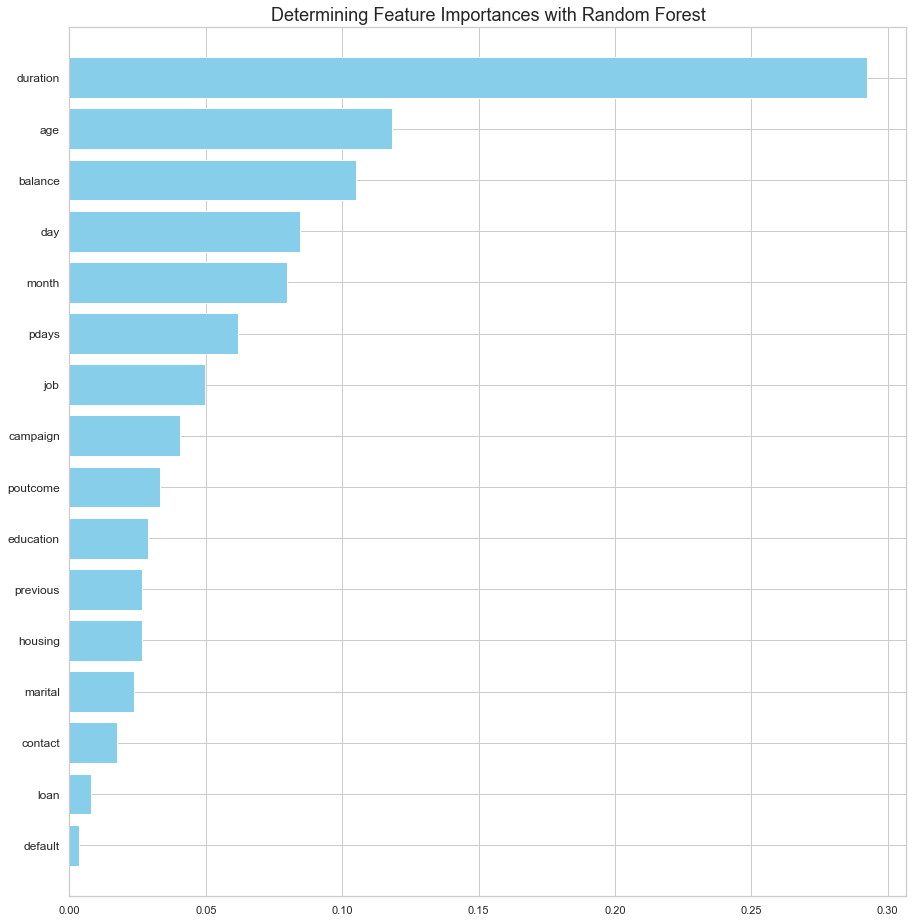

In [79]:
### Random forest
### duration, age, balance, day, month, pdays, job, campaign, previous, poutcome, marital, education
model = RandomForestClassifier(n_estimators=30, random_state=2022)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::1]

myTitle = "Determining Feature Importances with Random Forest"
def feature_importance_graph(indices, importances, feature_names, title_name):
    plt.figure(figsize=(15,16))
    plt.title(title_name, fontsize=18)
    plt.barh(range(len(indices)), importances[indices],  align="center", color='skyblue')
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=12)
    plt.ylim([-1, len(indices)])
#     plt.ylim([len(indices)-20, len(indices)])
#     plt.grid(b=None)
    plt.show()
    return(feature_names[indices])

randomForestColLint = feature_importance_graph(indices, importances, feature_names, myTitle)

In [80]:
# ***** feature selection by random forest ******

X_train_rf = X_train.loc[:, randomForestColLint]
X_test_rf = X_test.loc[:, randomForestColLint]

In [81]:
model_logistic_2 = LogisticRegression(random_state=2022, solver='lbfgs', max_iter=10000)
model_logistic_2.fit(X_train_rf, y_train)
pred_logistic_2 = model_logistic_2.predict(X_test_rf)
print(f'model_logistic_2, Training set accuracy: {model_logistic_2.score(X_train_rf, y_train)*100:.2f}%')
print(f'model_logistic_2, Test set accuracy: {model_logistic_2.score(X_test_rf, y_test)*100:.2f}%') # slightly worse

model_rf_2 = RandomForestClassifier(max_depth=15, random_state=2022) # The maximum depth of the tree = 5.
model_rf_2.fit(X_train_rf, y_train)
pred_rf_2 = model_rf_2.predict(X_test_rf)
print(f'model_rf_2, Training set accuracy: {model_rf_2.score(X_train_rf, y_train)*100:.2f}%' )
print(f'model_rf_2, Test set accuracy: {model_rf_2.score(X_test_rf, y_test)*100:.2f}%' ) # slightly better

model_logistic_2, Training set accuracy: 88.90%
model_logistic_2, Test set accuracy: 88.40%
model_rf_2, Training set accuracy: 99.52%
model_rf_2, Test set accuracy: 87.73%


In [82]:
# None, to use the default 5-fold cross validation,
print(cross_val_score(model_logistic_2, X_train, y_train, cv=None))
print(cross_val_score(model_logistic_2, X_test, y_test, cv=None))

[0.88428325 0.89637306 0.88062284 0.89446367 0.88581315]
[0.89502762 0.87845304 0.88950276 0.87292818 0.86740331]


## Confusion matrix

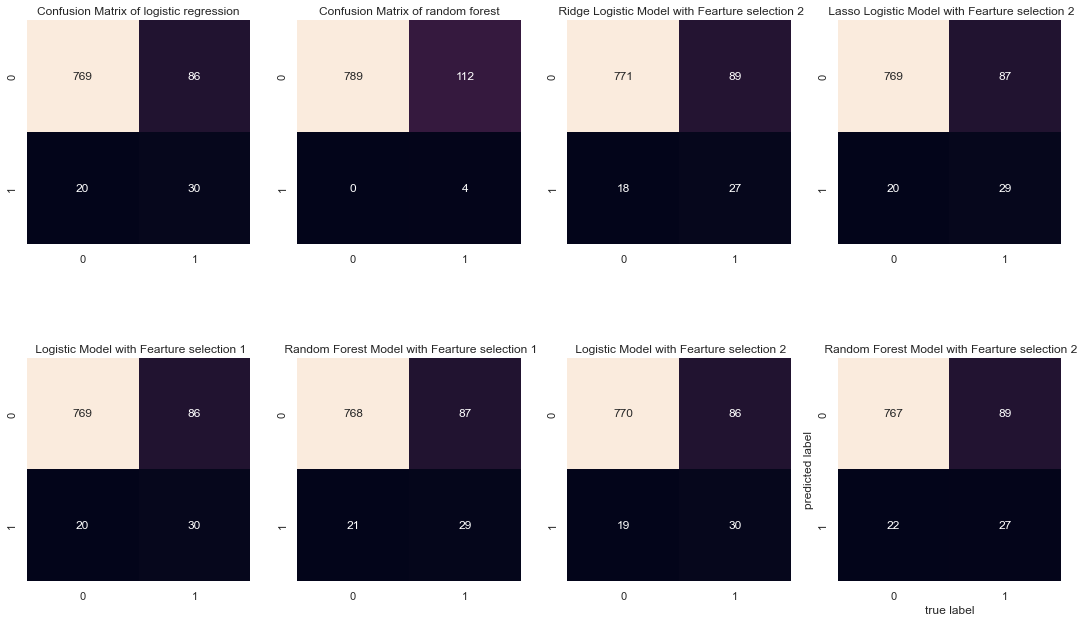

In [83]:
# print(confusion_matrix(y_test, pred_logistic))
fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(15, 10))
mat_logistic = confusion_matrix(y_test, pred_logistic)
sns.heatmap(mat_logistic.T, square=True, annot=True, fmt='d', cbar=False,
# xticklabels=['Y=0','Y=1'],
# yticklabels=['Y=0','Y=1']
           ax=axs[0,0])
axs[0,0].title.set_text("Confusion Matrix of logistic regression")
plt.xlabel('true label')
plt.ylabel('predicted label')

# from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, pred_logistic))

mat_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[0,1]
           )
axs[0,1].title.set_text("Confusion Matrix of random forest")
plt.xlabel('true label')
plt.ylabel('predicted label')

mat_logistic_ridge = confusion_matrix(y_test, pred_logistic_ridge)
sns.heatmap(mat_logistic_ridge.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[0,2]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[0,2].title.set_text(" Ridge Logistic Model with Fearture selection 2")

mat_logistic_lasso = confusion_matrix(y_test, pred_logistic_lasso)
sns.heatmap(mat_logistic_lasso.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[0,3]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[0,3].title.set_text(" Lasso Logistic Model with Fearture selection 2")

mat_logistic_1 = confusion_matrix(y_test, pred_logistic_1)
sns.heatmap(mat_logistic_1.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,0]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,0].title.set_text(" Logistic Model with Fearture selection 1")

mat_rf_1 = confusion_matrix(y_test, pred_rf_1)
sns.heatmap(mat_rf_1.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,1]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,1].title.set_text(" Random Forest Model with Fearture selection 1")

mat_logistic_2 = confusion_matrix(y_test, pred_logistic_2)
sns.heatmap(mat_logistic_2.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,2]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,2].title.set_text(" Logistic Model with Fearture selection 2")

mat_rf_2 = confusion_matrix(y_test, pred_rf_2)
sns.heatmap(mat_rf_2.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,3]
# xticklabels=['Y=0','Y=1'], yticklabels=['Y=0','Y=1']
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,3].title.set_text(" Random Forest Model with Fearture selection 2")
fig.tight_layout()
plt.show()

## Logistic Regression for Imbalanced Classification

In [84]:
from sklearn.utils.class_weight import compute_class_weight

weighting = compute_class_weight(class_weight = 'balanced', classes = [0,1],  y = y_train)
print(weighting)

[0.56286493 4.47678019]


In [85]:
model_logisticimb = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000)
model_logisticimb.fit(X_train, y_train)
train_logisticimb = model_logisticimb.predict(X_train)
pred_logisticimb = model_logisticimb.predict(X_test)
acc_logisticimb0 = accuracy_score(train_logisticimb, y_train) 
acc_logisticimb = accuracy_score(pred_logisticimb, y_test) 

In [86]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
score1=cross_val_score(model_logistic, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score2=cross_val_score(model_logistic, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
score3=cross_val_score(model_logisticimb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score4=cross_val_score(model_logisticimb, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC of logsitic training: %.3f' % mean(score1))
print('Mean ROC AUC of logsitic testing: %.3f' % mean(score2))
print('Mean ROC AUC of imbalanced logsitic training: %.3f' % mean(score3))
print('Mean ROC AUC of imbalanced logsitic testing: %.3f' % mean(score4))

Mean ROC AUC of logsitic training: 0.859
Mean ROC AUC of logsitic testing: 0.866
Mean ROC AUC of imbalanced logsitic training: 0.860
Mean ROC AUC of imbalanced logsitic testing: 0.865


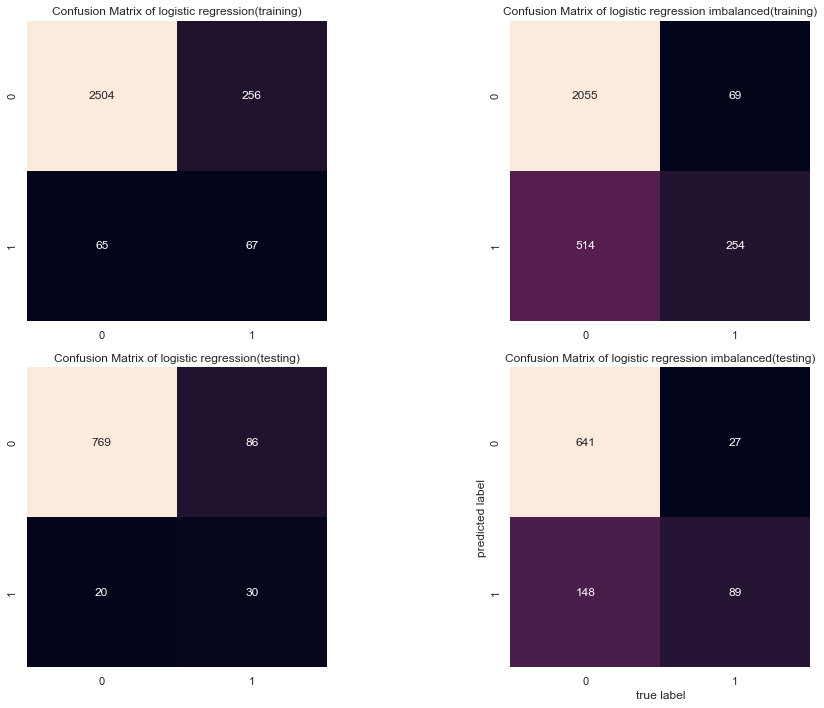

In [87]:
#print(confusion_matrix(y_test, pred_logisticimb))
#print(confusion_matrix(y_test, pred_logistic))

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15, 10))
mat_logistic1 = confusion_matrix(y_train, train_logistic)
sns.heatmap(mat_logistic1.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[0,0])
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[0,0].title.set_text("Confusion Matrix of logistic regression(training)")

mat_logisticimb1 = confusion_matrix(y_train, train_logisticimb)
sns.heatmap(mat_logisticimb1.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[0,1].title.set_text("Confusion Matrix of logistic regression imbalanced(training)")

mat_logistic = confusion_matrix(y_test, pred_logistic)
sns.heatmap(mat_logistic.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,0])
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,0].title.set_text("Confusion Matrix of logistic regression(testing)")

mat_logisticimb = confusion_matrix(y_test, pred_logisticimb)
sns.heatmap(mat_logisticimb.T, square=True, annot=True, fmt='d', cbar=False, ax=axs[1,1])
plt.xlabel('true label')
plt.ylabel('predicted label')
axs[1,1].title.set_text("Confusion Matrix of logistic regression imbalanced(testing)")
fig.tight_layout()
plt.show()